<a href="https://colab.research.google.com/github/SANTHAN-2006/Lumi-HSP/blob/main/iit_shasstra(new).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
# Load datasets
test_data = pd.read_csv("/content/test_data_covid.csv")
train_data  = pd.read_csv("/content/train_data_covid.csv")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15001 entries, 0 to 15000
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       15001 non-null  int64 
 1   Date                      15001 non-null  object
 2   Time                      15001 non-null  object
 3   State/UnionTerritory      15001 non-null  object
 4   ConfirmedIndianNational   15001 non-null  object
 5   ConfirmedForeignNational  15001 non-null  object
 6   Cured                     15001 non-null  int64 
 7   Deaths                    15001 non-null  int64 
 8   Confirmed                 15001 non-null  int64 
 9   OxygenTanks               15001 non-null  int64 
 10  PopulationDensityPerSqKm  15001 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 1.3+ MB


In [27]:
# Data preprocessing
# Conversion of date and time to individual columns
df2 = train_data.convert_dtypes()

dt_pr = pd.to_datetime(train_data['Date'], format='mixed')
tm_pr = pd.to_datetime(train_data['Time'], format='mixed')

df2['Day'], df2['Month'], df2['Year'] = dt_pr.dt.day, dt_pr.dt.month, dt_pr.dt.year
df2['Hour'] = tm_pr.dt.hour
df2['Minutes'] = tm_pr.dt.minute

df2 = df2.drop(columns=['Date', 'Time'])
df2 = df2.rename(columns={"State/UnionTerritory": "State"})

# One-hot encoding for the 'State' column
df2 = pd.get_dummies(df2, columns=['State'], drop_first=True)

df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15001 entries, 0 to 15000
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Sno                                             15001 non-null  Int64 
 1   ConfirmedIndianNational                         15001 non-null  string
 2   ConfirmedForeignNational                        15001 non-null  string
 3   Cured                                           15001 non-null  Int64 
 4   Deaths                                          15001 non-null  Int64 
 5   Confirmed                                       15001 non-null  Int64 
 6   OxygenTanks                                     15001 non-null  Int64 
 7   PopulationDensityPerSqKm                        15001 non-null  Int64 
 8   Day                                             15001 non-null  int32 
 9   Month                                           15

In [28]:
# Data preprocessing
# Conversion of date and time to individual columns
df3 = test_data.convert_dtypes()

dt_pr = pd.to_datetime(test_data['Date'], format='mixed')
tm_pr = pd.to_datetime(test_data['Time'], format='mixed')

df3['Day'], df3['Month'], df3['Year'] = dt_pr.dt.day, dt_pr.dt.month, dt_pr.dt.year
df3['Hour'] = tm_pr.dt.hour
df3['Minutes'] = tm_pr.dt.minute

df3 = df3.drop(columns=['Date', 'Time'])
df3 = df3.rename(columns={"State/UnionTerritory": "State"})

# One-hot encoding for the 'State' column
df3 = pd.get_dummies(df3, columns=['State'], drop_first=True)

df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3110 entries, 0 to 3109
Data columns (total 53 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Sno                                             3110 non-null   Int64 
 1   ConfirmedIndianNational                         3110 non-null   string
 2   ConfirmedForeignNational                        3110 non-null   string
 3   Cured                                           3110 non-null   Int64 
 4   Confirmed                                       3110 non-null   Int64 
 5   OxygenTanks                                     3110 non-null   Int64 
 6   PopulationDensityPerSqKm                        3110 non-null   Int64 
 7   Day                                             3110 non-null   int32 
 8   Month                                           3110 non-null   int32 
 9   Year                                            3110

In [45]:
# applied one-hot encoding so, ignoring this step
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#df2['State']=le.fit_transform(df2['State'])
#df2

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15001 entries, 0 to 15000
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Sno                                             15001 non-null  Int64 
 1   ConfirmedIndianNational                         15001 non-null  string
 2   ConfirmedForeignNational                        15001 non-null  string
 3   Cured                                           15001 non-null  Int64 
 4   Deaths                                          15001 non-null  Int64 
 5   Confirmed                                       15001 non-null  Int64 
 6   OxygenTanks                                     15001 non-null  Int64 
 7   PopulationDensityPerSqKm                        15001 non-null  Int64 
 8   Day                                             15001 non-null  int32 
 9   Month                                           15

In [33]:
# No need for LabelEncoder since one-hot encoding was applied
# Remove this cell or comment it out
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df3['State'] = le.fit_transform(df3['State'])
# df3

In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3110 entries, 0 to 3109
Data columns (total 53 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Sno                                             3110 non-null   Int64 
 1   ConfirmedIndianNational                         3110 non-null   string
 2   ConfirmedForeignNational                        3110 non-null   string
 3   Cured                                           3110 non-null   Int64 
 4   Confirmed                                       3110 non-null   Int64 
 5   OxygenTanks                                     3110 non-null   Int64 
 6   PopulationDensityPerSqKm                        3110 non-null   Int64 
 7   Day                                             3110 non-null   int32 
 8   Month                                           3110 non-null   int32 
 9   Year                                            3110

In [13]:
# def forecast_deaths(df2,df3):
#     forecasts = []
#     for state_code, state_data in df3.groupby('State'):
#         train_state_data = df2[df2['State'] == state_code]['Deaths']
#         model = ARIMA(train_state_data, order=(5,1,0))  # Example ARIMA order
#         model_fit = model.fit()
#         forecast = model_fit.forecast(steps=len(state_data))[0]
#         forecasts.extend(forecast)
#     return forcastes

In [14]:
# predicted_deaths = forecast_deaths(df2,df3)

In [15]:
# # Prepare submission file
# submission_data['Deaths'] = predicted_deaths
# submission_data.to_csv("forecasted_deaths.csv", index=False)

In [36]:
x = df2[['Sno','Cured','Confirmed', 'OxygenTanks','Year','Month','Day','Hour']]
y=df2['Deaths']

In [37]:
X = df3[['Sno','Cured','Confirmed', 'OxygenTanks','Year','Month','Day','Hour']]

In [38]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,random_state=1)
model.fit(x,y)

# Extract feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

       Feature    Importance
1        Cured  6.978279e-01
2    Confirmed  2.362227e-01
0          Sno  4.385668e-02
5        Month  1.021586e-02
4         Year  9.641544e-03
6          Day  1.293324e-03
3  OxygenTanks  9.418767e-04
7         Hour  5.152422e-08


In [39]:
predictions = model.predict(X)
forecast= pd.DataFrame({'Sno': X['Sno'], 'Deaths': predictions})

In [40]:
predictions

array([  297.4 ,    45.6 ,   206.05, ...,  3495.87, 18337.8 , 15396.33])

In [41]:
predictions

array([  297.4 ,    45.6 ,   206.05, ...,  3495.87, 18337.8 , 15396.33])

In [42]:
forecast.to_csv("Forecasted21.csv",index=False)
predictions

array([  297.4 ,    45.6 ,   206.05, ...,  3495.87, 18337.8 , 15396.33])

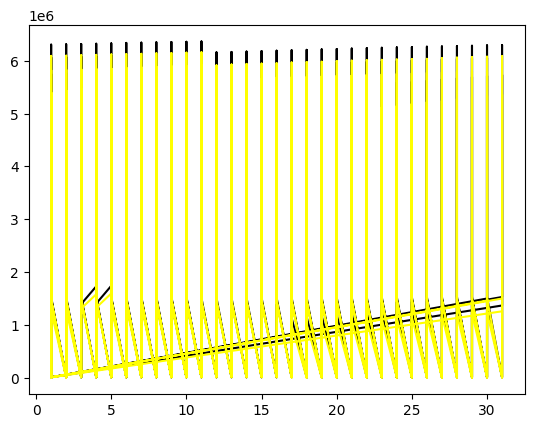

In [43]:
import matplotlib.pyplot as plt
plt.plot(df3['Day'],df3['Confirmed'],color='black')
plt.plot(df3['Day'],df3['Cured'],color='yellow')
plt.show()